<h1 align=center><font size = 5>Assignment 3: Support Vector Machines</font>

<font size = 4>Submitted by: Lujain Khalil</font>

<font size = 4>AUS Email: g00082632@alumni.aus.edu</font>

### a) Generate a scatter plot of the data in “customers_data.csv”. Color code the data points to visualize the datapoints belonging to each class.

Reading the data

In [1]:
import pandas as pd

customers_data = pd.read_csv('customers_data.csv')
customers_data.head()

,debt_to_income_ratio,credit_score,default
0,0.177052,773.283908,0
1,0.177856,707.287883,0
2,0.184835,745.822031,0
3,0.100024,802.684603,0
4,0.375014,458.766013,1


Visualizing class distribution

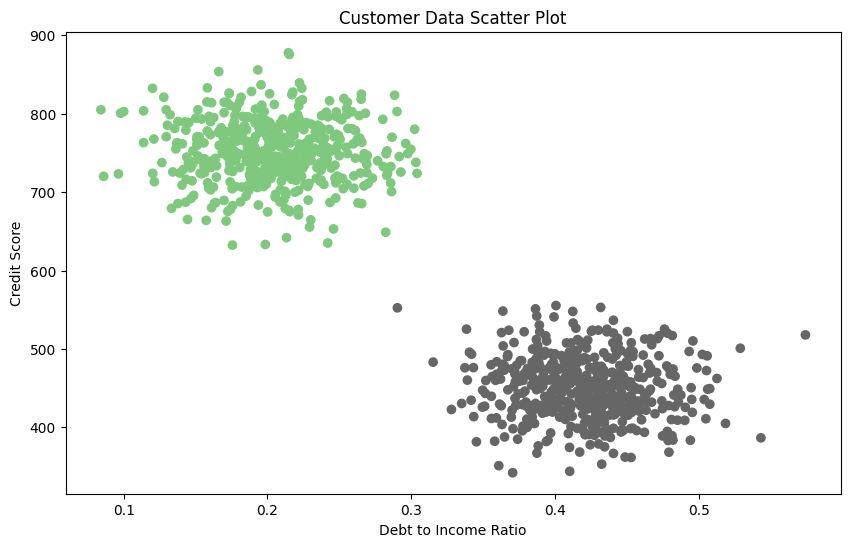

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(customers_data['debt_to_income_ratio'], customers_data['credit_score'], c = customers_data['default'], cmap ="Accent")
plt.xlabel('Debt to Income Ratio')
plt.ylabel('Credit Score')
plt.title('Customer Data Scatter Plot')
plt.show()

### b) Preprocess the data and build an SVM classifier with very large C value. What type of margin classifier is this?

Preprocessing the data

In [ ]:
from sklearn.preprocessing import StandardScaler

# Functions will be defined to be used consistently throughout this code
def process_df(df):
    X = df[['debt_to_income_ratio', 'credit_score']].values
    y = df['default'].values

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    print(f'df: {df.shape}')
    print(f'X: {X.shape}')
    print(f'y: {y.shape}')
    print(f'X_scaled: {X_scaled.shape}')

    return X, y, X_scaled

X, y, X_scaled = process_df(customers_data)

df: (1000, 3)
X: (1000, 2)
y: (1000,)
X_scaled: (1000, 2)


Building the SVM classifier with a very large C value, making it a **hard margin classifer**

In [4]:
from sklearn.svm import SVC

hard_svm = SVC(C = 1e10, kernel='linear')
hard_svm.fit(X_scaled, y)

SVC(C=10000000000.0, kernel='linear')

### c) Plot the decision boundary of the resulting SVM model and show the margins and the resulting support vectors. How many support vectors are there?

In [5]:
import numpy as np

# Generating desicion boundary, margins, and support vectors for a given SVM model
def plot_all(svm, df, X_scaled, title):
    # Getting model coefficients, intercept, and support vectors
    coefs = svm.coef_
    intercept = svm.intercept_
    support_vectors = svm.support_vectors_

    # Calculating decision boundary
    debt_to_income_ratio_min = X_scaled[:, 0].min()
    debt_to_income_ratio_max = X_scaled[:, 0].max()
    x_values = np.linspace(debt_to_income_ratio_min, debt_to_income_ratio_max, 100)
    decision_boundary = -(coefs[0][0] * x_values + intercept) / coefs[0][1]

    # Calculating margins
    margin_distance = 1 / np.sqrt((coefs[0][0] ** 2) + (coefs[0][1] ** 2))
    upper_margin = decision_boundary + margin_distance
    lower_margin = decision_boundary - margin_distance

    # Generating plot
    plt.figure(figsize=(10, 8))
    plt.scatter(X_scaled[:,0], X_scaled[:,1], c=df['default'], s=20, cmap="Accent")

    plt.plot(x_values, decision_boundary, color='purple', linestyle='--', label='Decision Boundary')

    plt.plot(x_values, upper_margin, color='grey', linestyle=':', label='Upper SVM Margin')
    plt.plot(x_values, lower_margin, color='grey', linestyle=':', label='Lower SVM Margin')

    plt.scatter(support_vectors[:,0], support_vectors[:,1], s=200, marker='*', facecolors='orange', label='Support vectors')

    plt.xlabel('Debt to Income Ratio (Scaled)')
    plt.ylabel('Credit Score (Scaled)')
    plt.title(f'Customer Data with Decision Boundaries - {title}')

    plt.legend()
    plt.show()

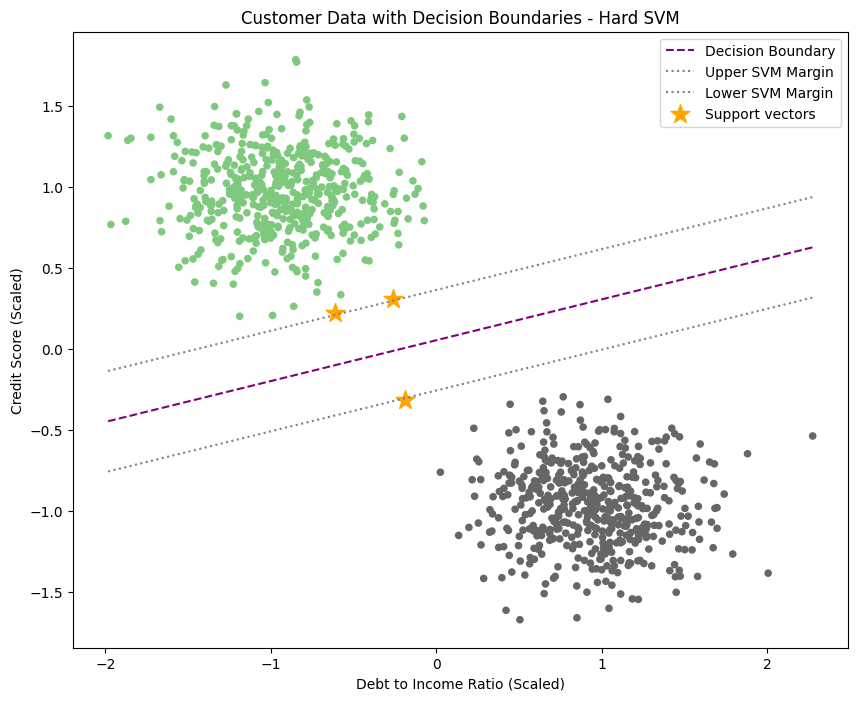

In [6]:
plot_all(hard_svm, customers_data, X_scaled, 'Hard SVM')

We can see that there are **3 support vectors** for a hard margin SVM classifier 

### d) Evaluate the classifier on the “customers_data_test.csv”. Report the value(s) of the appropriate evaluation metric(s).

Reading `customers_data_test.csv`

In [7]:
test_df = pd.read_csv('customers_data_test.csv')
test_df.head()

,debt_to_income_ratio,credit_score,default
0,0.302919,480.825390,1
1,0.375017,474.123787,1
2,0.371863,325.946926,1
3,0.226629,772.590299,0
4,0.157082,793.688387,0


In [8]:
X_test, y_test, X_test_scaled = process_df(test_df)

df: (200, 3)
X: (200, 2)
y: (200,)
X_scaled: (200, 2)


Making predicitons on the test data and reporting evaluation metrics

Accuracy: 0.9850
F1 Score: 0.9849
Recall: 0.9800
Precision: 0.9899


<Figure size 1200x500 with 0 Axes>

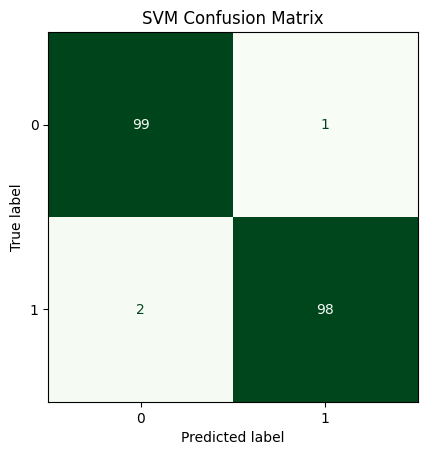

In [9]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, ConfusionMatrixDisplay

# Function to print evaluation metrics and plot confusion matrix
def evaluate(y_pred, y_test):

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"Precision: {precision:.4f}")

    plt.figure(figsize=(12, 5))
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Greens", colorbar=False)
    plt.title("SVM Confusion Matrix")
    plt.show()

y_pred = hard_svm.predict(X_test_scaled)
evaluate(y_pred, y_test)

### e) Use the “customers_data_full.csv” dataset to build an SVM classifier. Set the value of C to be a very large value.

Reading `customers_data_full.csv`

In [10]:
full_df = pd.read_csv('customers_data_full.csv')
full_df.head()

,debt_to_income_ratio,credit_score,default
0,0.168127,718.363544,0
1,0.410404,503.140861,1
2,0.178578,790.184985,0
3,0.422786,481.340185,1
4,0.285342,729.837279,0


In [11]:
X_full, y_full, X_full_scaled = process_df(full_df)

df: (2000, 3)
X: (2000, 2)
y: (2000,)
X_scaled: (2000, 2)


Visualising class distribution of full data

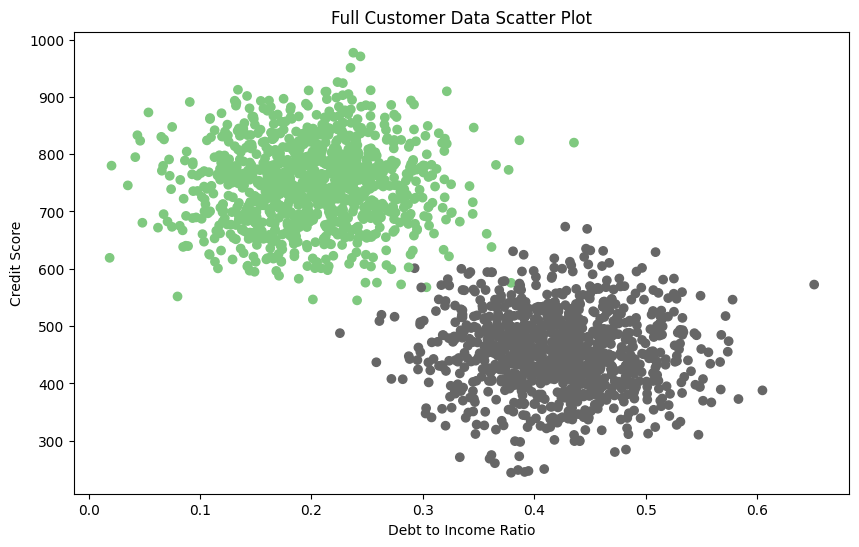

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(full_df['debt_to_income_ratio'], full_df['credit_score'], c = full_df['default'], cmap ="Accent")
plt.xlabel('Debt to Income Ratio')
plt.ylabel('Credit Score')
plt.title('Full Customer Data Scatter Plot')
plt.show()

In [13]:
hard_svm_full = SVC(C = 1e10, kernel='linear')
hard_svm_full.fit(X_full_scaled, y_full)

SVC(C=10000000000.0, kernel='linear')

Plotting decision boundary, margins, and support vectors

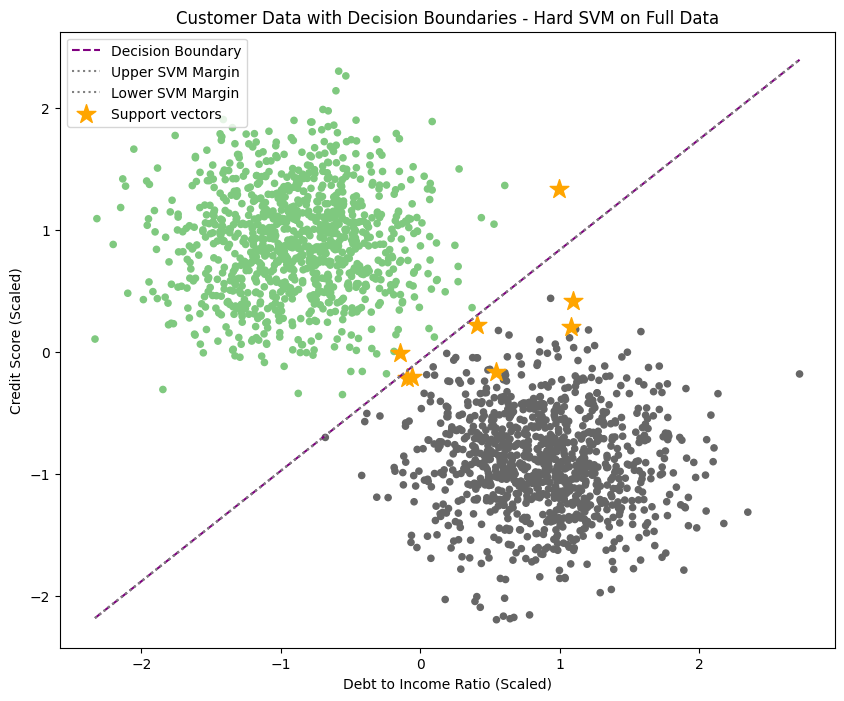

In [14]:
plot_all(hard_svm_full, full_df, X_full_scaled, 'Hard SVM on Full Data')

### f) Discuss any issues you run into when building an SVM classifier using “customers_data_full.csv” and a large value for C. Explain what could be causing those issues

A hard margin SVM perfectly memorized the data, causing a very tight decision boundary. This is clear from the extremely small margins in the plot above (you physically cannot see it from how small it is). The model is overly complex and will fail to perform well to new, unseen data. This is explained by the fact that the full data is not as well seperated as it's subset, cauing the tight margins.

### g) Build an SVM classifier that is suitable for the data in “customers_data_full.csv”. What type of margin classifier is this?

Building an SVM with a much lower C value, making it a **soft margin classifier**

In [16]:
soft_svm_full = SVC(C = 1, kernel='linear')
soft_svm_full.fit(X_full_scaled, y_full)

SVC(C=1, kernel='linear')

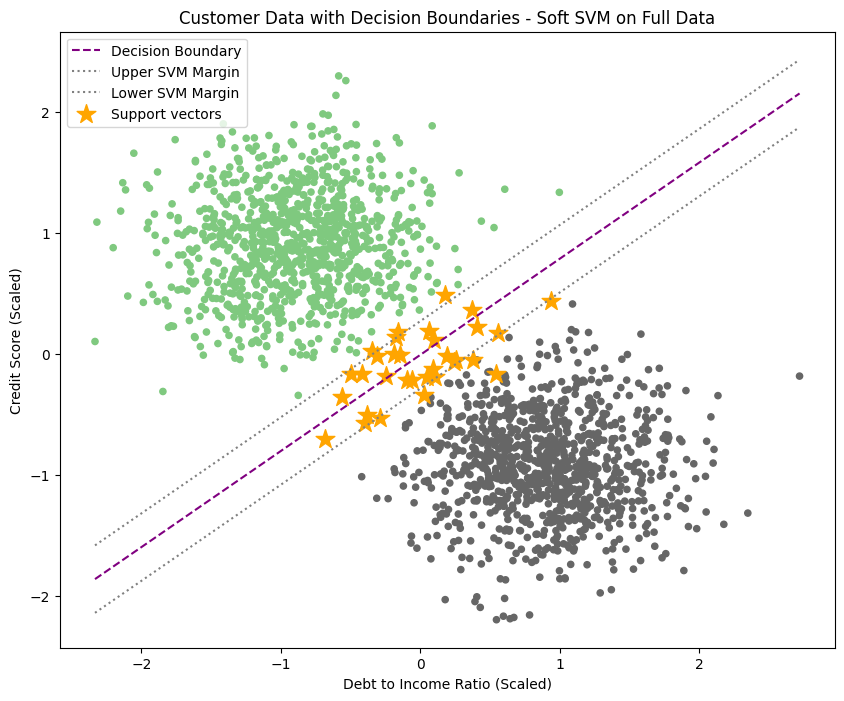

In [17]:
plot_all(soft_svm_full, full_df, X_full_scaled, 'Soft SVM on Full Data')

We can see that the margins are much wider with a soft SVM, allowing for better generalization performance. 

### h) Choose the value of C that results in the best performance.

We will run 5-fold cross validation for a list of different C values using BayesSearchCV to find the model with the best training accuracy. Since the data is large relative to the computational resources at hand (local PC), BayesSearchCV is used instead of an exhaustive method like GridSearchCV

In [19]:
from skopt import BayesSearchCV

opt = BayesSearchCV(
    estimator=SVC(kernel='linear', probability=True, random_state=42),
    search_spaces={'C': (1e-10, 1e10, 'log-uniform')},
    scoring='accuracy',
    cv=5,
    n_iter=20,
    random_state=42
)
opt.fit(X_full_scaled, y_full)

print(f"Best C value: {opt.best_params_['C']}")
print(f"Best Accuracy: {opt.best_score_}")

Best C value: 0.01592499032163409
Best Accuracy: 0.998


### i) Plot the decision boundary of the resulting SVM model and show the margins and the resulting support vectors. How many support vectors are there?

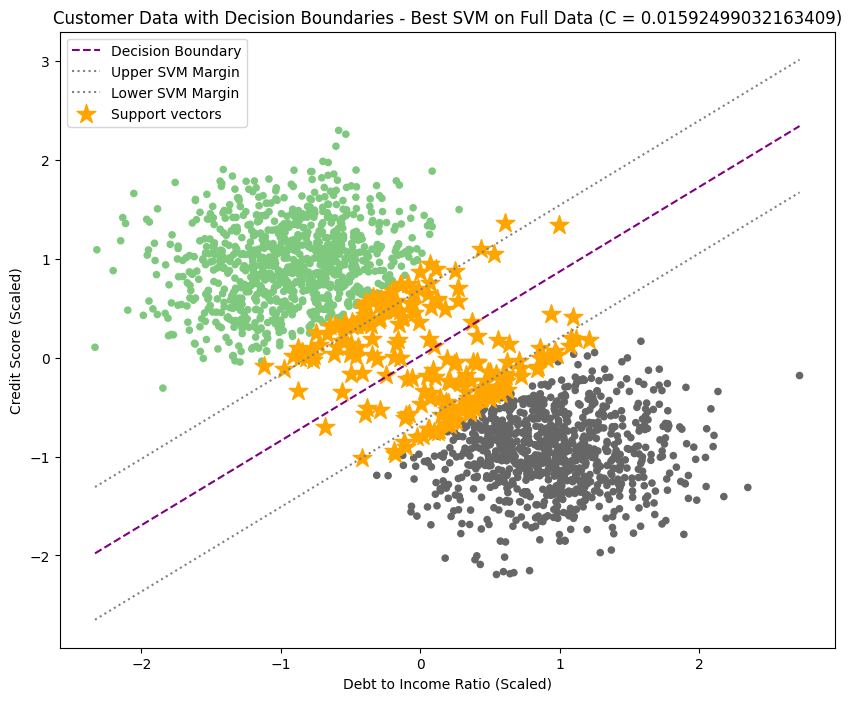

In [20]:
best_model = opt.best_estimator_
best_C = opt.best_params_['C']

plot_all(best_model, full_df, X_full_scaled, f'Best SVM on Full Data (C = {best_C})')

Retrieving traning accuracy and number of support vectors for the SVMs trained on the full data with C values of 1e10, 1, and 0.016

In [25]:
def train_acuracy(svm, C):
    y_pred_train = svm.predict(X_full_scaled)
    acc = accuracy_score(y_full, y_pred_train)
    print(f"C = {C:.3f} \tTraining Accuracy: {acc:.3f} \tSupport Vectors = {svm.support_vectors_.shape[0]}")

train_acuracy(hard_svm_full, 1e10)
train_acuracy(soft_svm_full, 1)
train_acuracy(best_model, best_C)

C = 10000000000.000 	Training Accuracy: 0.998 	Support Vectors = 8
C = 1.000 	Training Accuracy: 0.998 	Support Vectors = 32
C = 0.016 	Training Accuracy: 0.998 	Support Vectors = 202


There are 202 suppor vectors for an SVM classifier with a C value of 0.016. This model was able to achieve an accuracy of 99.8%, similar to the previous 2 SVMs trained on the full dataset. Support vectors are the data points that lie on or inside the margin boundary or are misclassified. These are the critical points that determine the decision boundary. A smaller C value caused wider margins, hence a larger number of datapoints inside the margin boundary.